In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

%matplotlib inline

In [2]:
sup=pd.read_csv("50_Startups.csv")
sup.head()
sup

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
sup.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [4]:
sup.rename(columns={'R&D Spend':'rds','Administration':'admin','Marketing Spend':'mar','Profit':'pro'},inplace=True)
sup.head()

,rds,admin,mar,State,pro
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


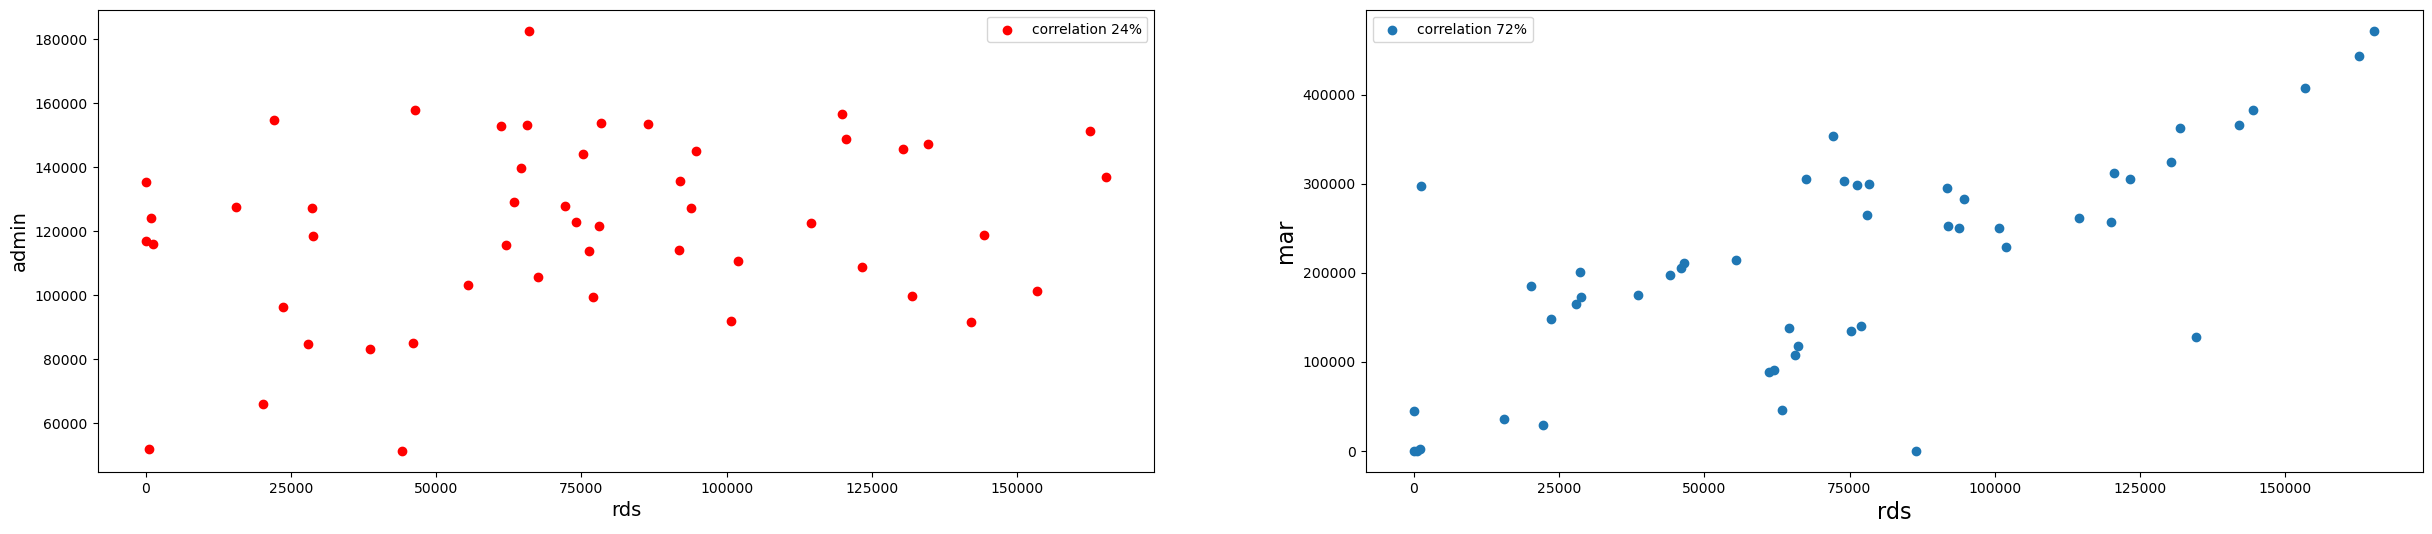

In [5]:
plt.figure(figsize=(30,6))
plt.subplot(1,2,1)
plt.scatter(sup["rds"],sup["admin"],color="red",label="correlation 24%")
plt.xlabel("rds",size=14)
plt.ylabel("admin",size=14)
plt.legend(loc="best")

plt.subplot(1,2,2)
plt.scatter(sup["rds"],sup["mar"],label="correlation 72%")
plt.xlabel("rds",size=16)
plt.ylabel("mar",size=16)
plt.legend(loc="best")

In [6]:
sup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rds     50 non-null     float64
 1   admin   50 non-null     float64
 2   mar     50 non-null     float64
 3   State   50 non-null     object 
 4   pro     50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
sup.isna().sum()

rds      0
admin    0
mar      0
State    0
pro      0
dtype: int64

<AxesSubplot:>

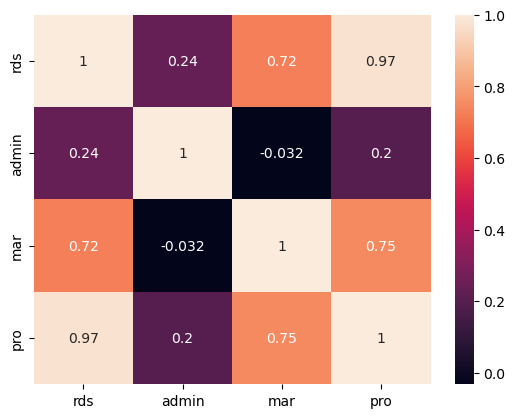

In [8]:
sns.heatmap(sup.corr(),annot=True)

In [9]:
sup.corr()

,rds,admin,mar,pro
rds,1.000000,0.241955,0.724248,0.972900
admin,0.241955,1.000000,-0.032154,0.200717
mar,0.724248,-0.032154,1.000000,0.747766
pro,0.972900,0.200717,0.747766,1.000000


# scatterplot b&w variables along with histograms

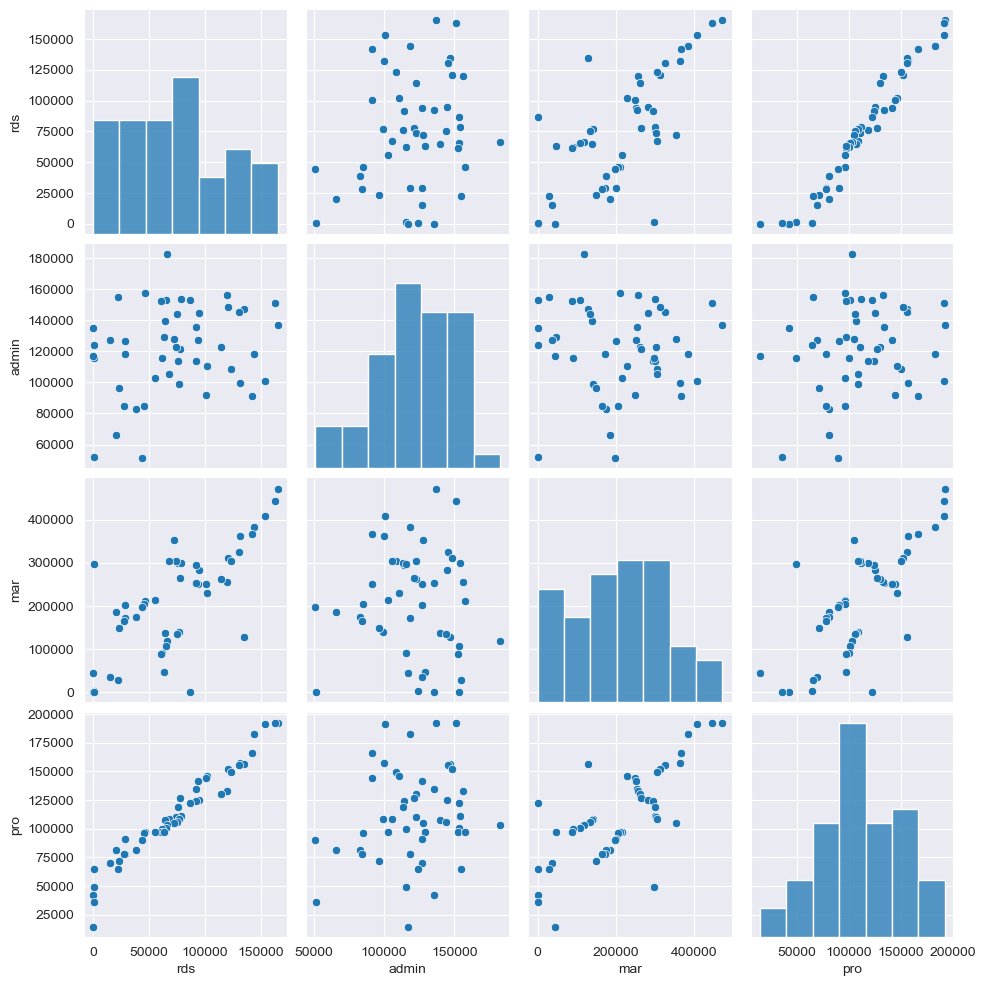

In [10]:
sns.set_style(style='darkgrid')
sns.pairplot(sup)

# preparing a model

In [11]:
import statsmodels.formula.api as smf
model=smf.ols('pro~rds+admin+mar',data=sup).fit()

In [12]:
model.rsquared

0.9507459940683246

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pro   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 24 Jan 2023   Prob (F-statistic):           4.53e-30
Time:                        11:51:18   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
rds            0.8057      0.045     17.846      0.000       0.715       0.897
admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
mar            0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# calculating vif

In [14]:
rsq_rds=smf.ols('rds~admin+mar',data=sup).fit().rsquared
vif_rds=1/(1-rsq_rds)

rsq_admin=smf.ols('admin~rds+mar',data=sup).fit().rsquared
vif_admin=1/(1-rsq_admin)

rsq_mar=smf.ols('mar~rds+admin',data=sup).fit().rsquared
vif_mar=1/(1-rsq_mar)

d2={'variables':['rds','admin','mar'],'VIF':[vif_rds,vif_admin,vif_mar]}
vif_frame=pd.DataFrame(d2)
vif_frame

,variables,VIF
0,rds,2.468903
1,admin,1.175091
2,mar,2.326773


# test for normality of residuals(Q-Q plot)

(array([1., 0., 0., 0., 0., 0., 2., 1., 0., 1., 4., 8., 6., 9., 3., 3., 6.,
        3., 1., 2.]),
 array([-33533.7341113 , -30993.27589008, -28452.81766886, -25912.35944764,
        -23371.90122642, -20831.4430052 , -18290.98478398, -15750.52656276,
        -13210.06834154, -10669.61012032,  -8129.1518991 ,  -5588.69367788,
         -3048.23545666,   -507.77723544,   2032.68098578,   4573.139207  ,
          7113.59742822,   9654.05564943,  12194.51387065,  14734.97209187,
         17275.43031309]),
 <BarContainer object of 20 artists>)

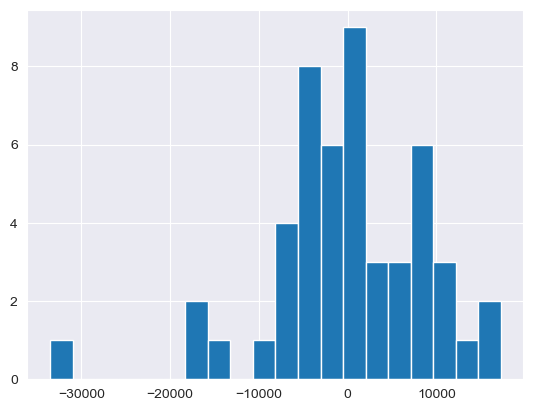

In [15]:
plt.hist(model.resid,bins=20)

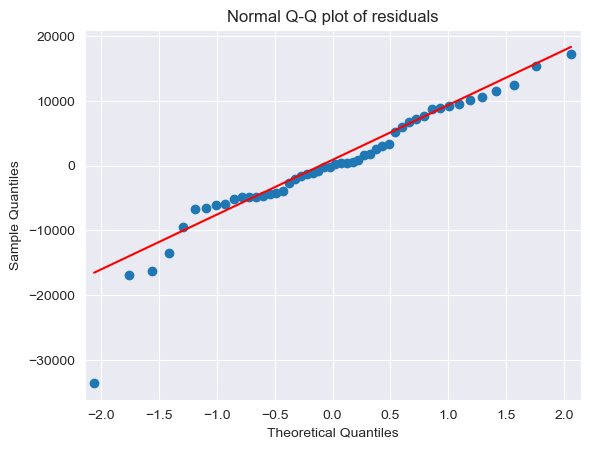

In [16]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

# residual plot for homoscedasticity

In [17]:
def get_standardized_values(vals):
    return (vals-vals.mean())/vals.std()

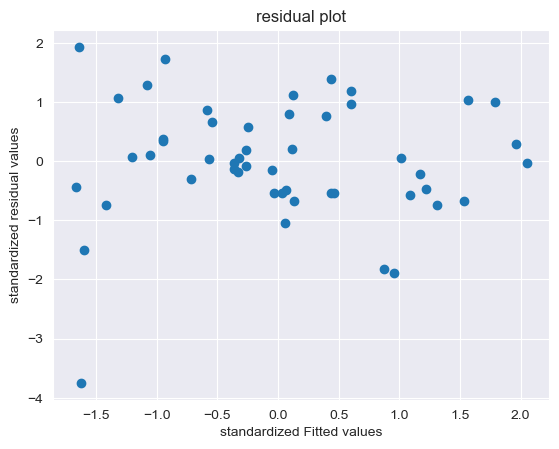

In [18]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('residual plot')
plt.xlabel('standardized Fitted values')
plt.ylabel('standardized residual values')
plt.show()

# residual vs regressors

eval_env: 1


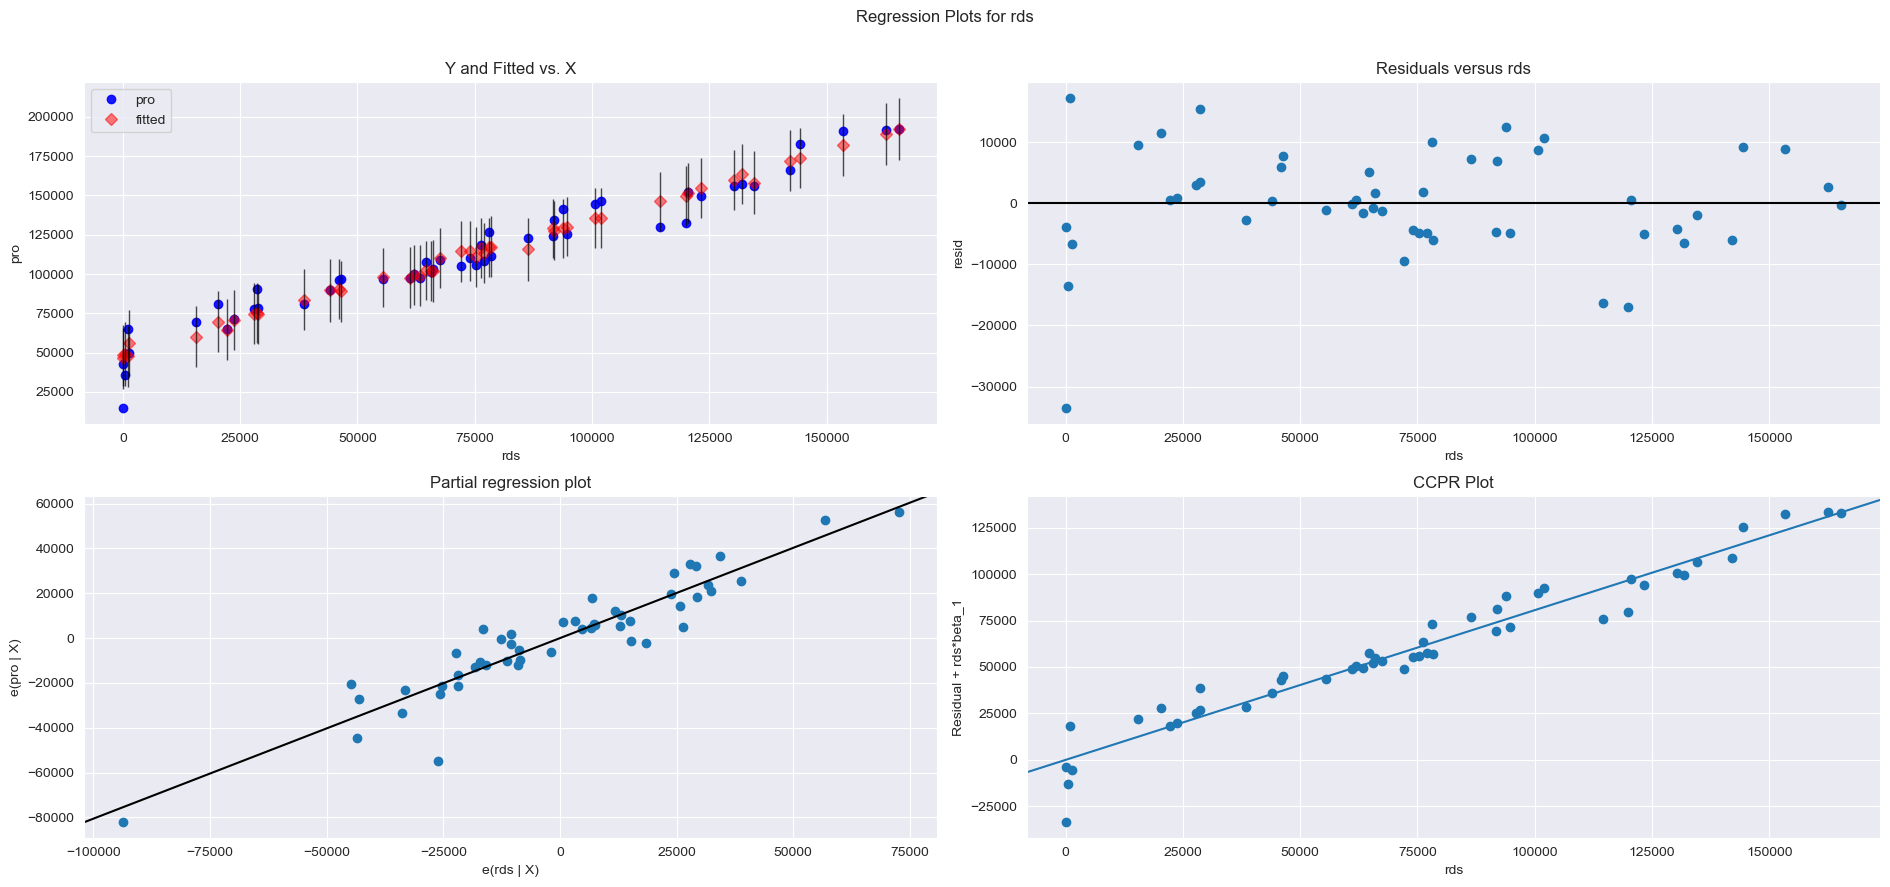

In [19]:
fig=plt.figure(figsize=(19,9))
sm.graphics.plot_regress_exog(model,"rds",fig=fig)
plt.show()

eval_env: 1


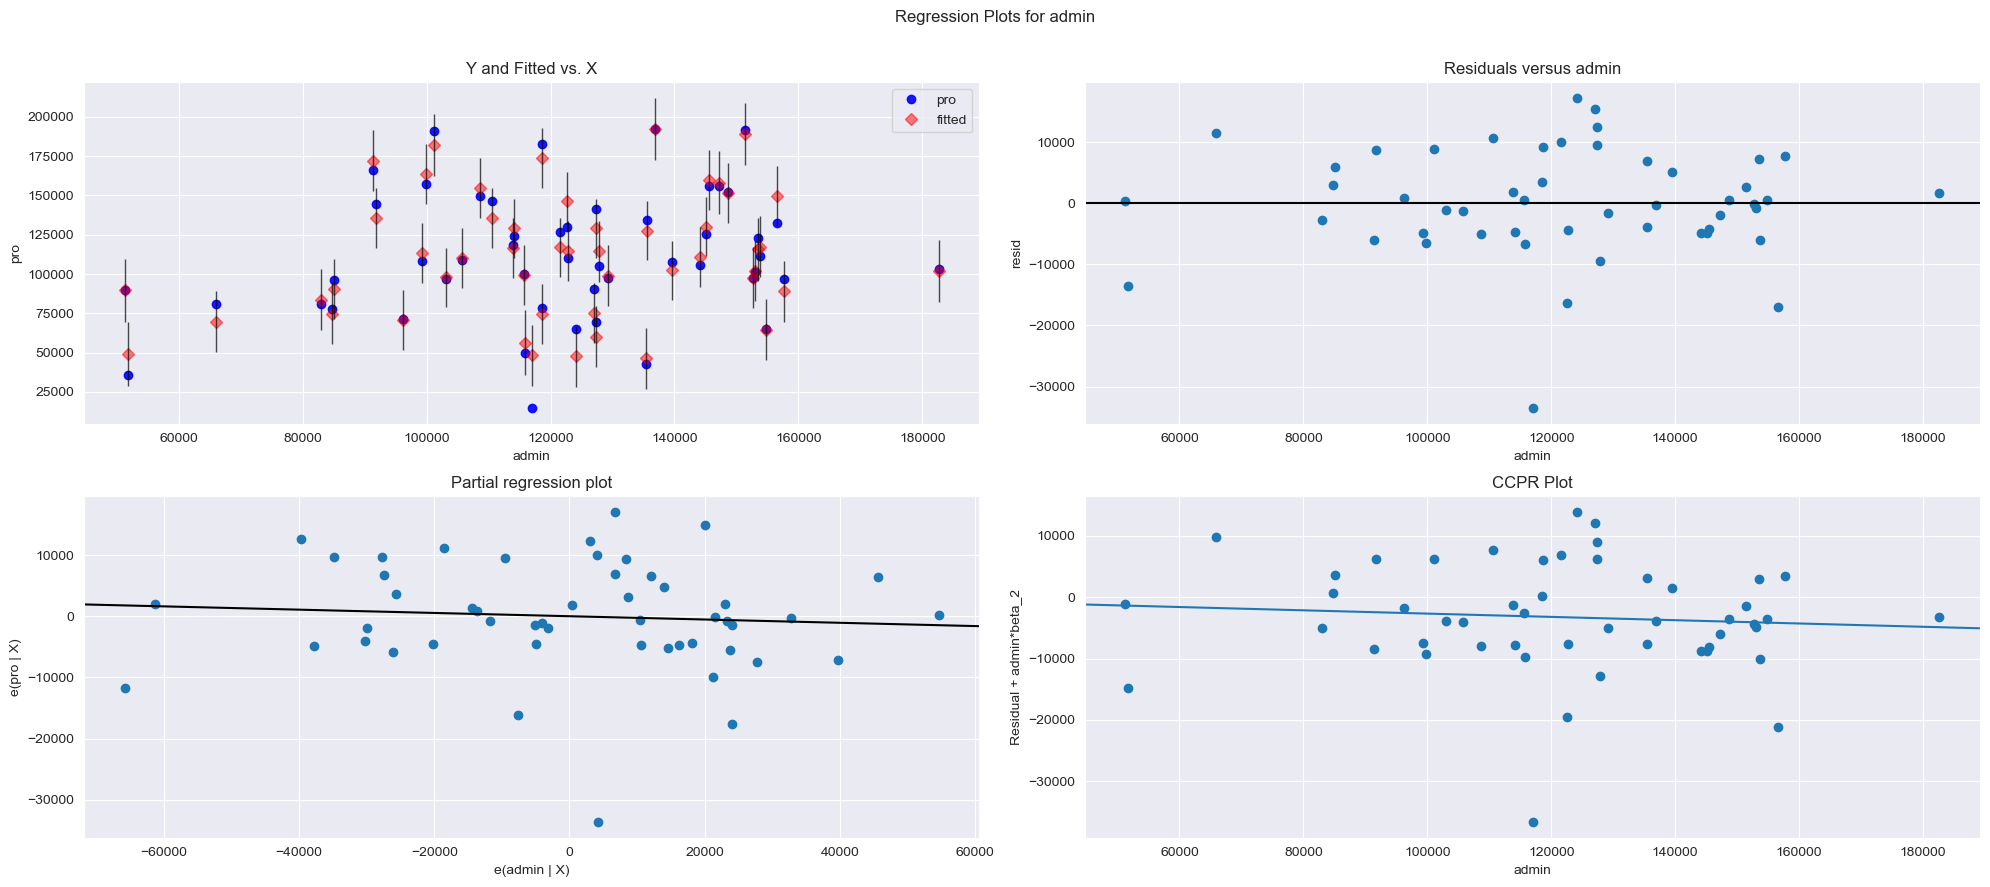

In [20]:
fig=plt.figure(figsize=(20,9))
sm.graphics.plot_regress_exog(model,"admin",fig=fig)
plt.show()

eval_env: 1


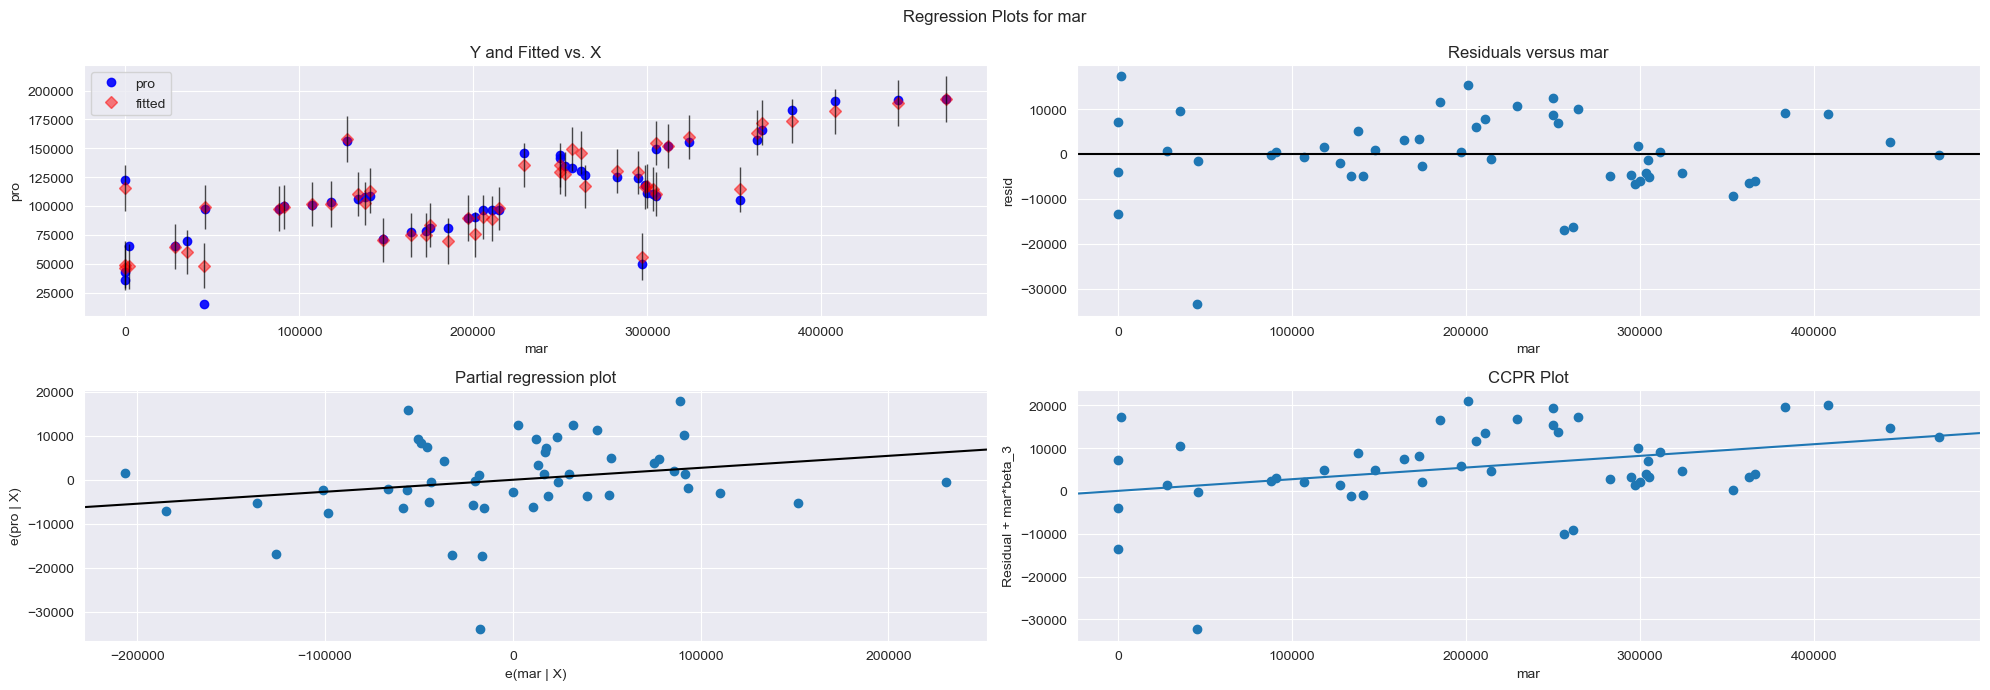

In [21]:
fig=plt.figure(figsize=(20,7))
sm.graphics.plot_regress_exog(model,"mar",fig=fig)
plt.show()

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pro   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 24 Jan 2023   Prob (F-statistic):           4.53e-30
Time:                        11:51:20   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
rds            0.8057      0.045     17.846      0.000       0.715       0.897
admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
mar            0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# model delection diagnostics

# detecting influencers/outliers

# cookes distance

In [23]:
model_influence=model.get_influence()
(c, _)=model_influence.cooks_distance

In [24]:
sup.shape

(50, 5)

In [25]:
k=3
n=50
3*(k+1)/n

0.24

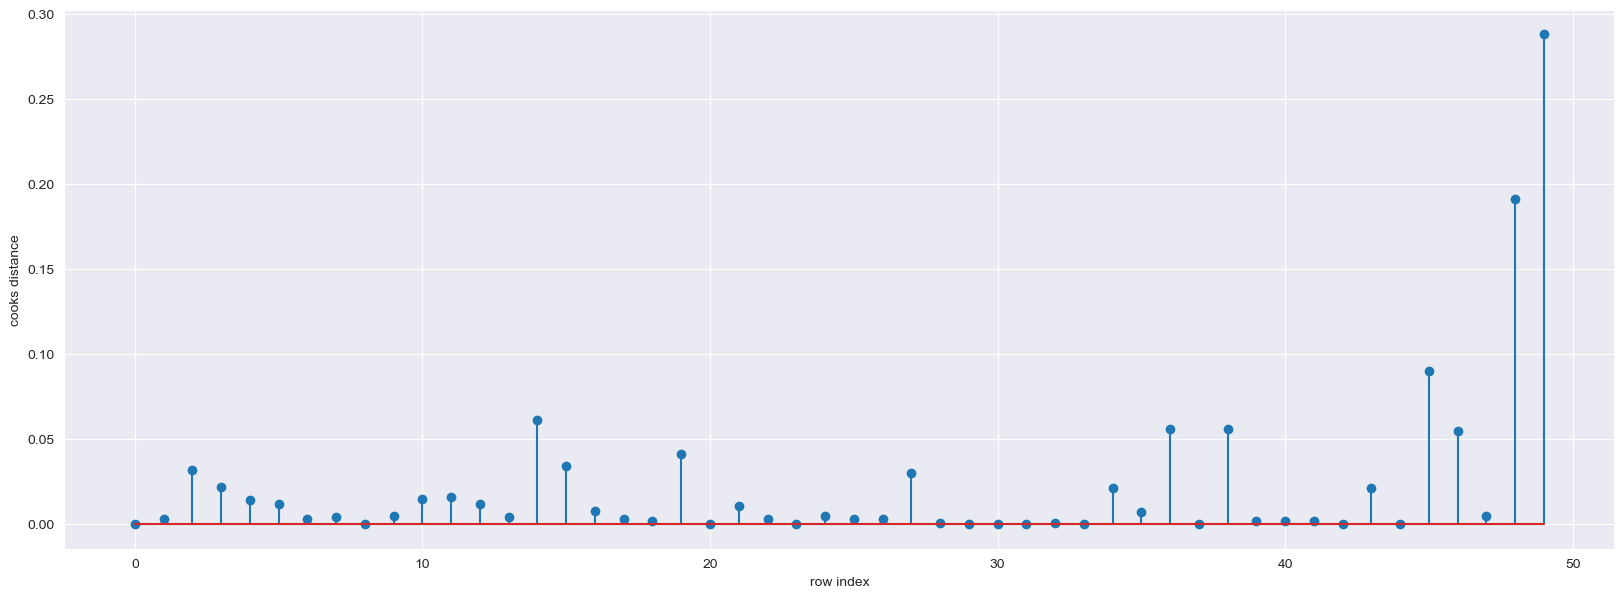

In [26]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(sup)), np.round(c, 3))
plt.xlabel('row index')
plt.ylabel('cooks distance')
plt.show()

In [27]:
np.where(c>0.24)

(array([49], dtype=int64),)

# improving the model

In [28]:
#sup_new=pd.read_csv("50_Startups.csv")

In [29]:
sup2=sup.drop(sup.index[[49]],axis=0).reset_index()

In [30]:
sup2=sup2.drop(['index'],axis=1)

In [31]:
sup2

,rds,admin,mar,State,pro
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# build model

In [35]:
final_ml_v=smf.ols('pro~admin+mar+rds',data=sup2).fit()

In [36]:
(final_ml_v.rsquared,final_ml_v.aic)

(0.9613162435129847, 1020.5652974526367)

In [37]:
final_ml_v.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pro   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Tue, 24 Jan 2023   Prob (F-statistic):           8.85e-32
Time:                        13:35:50   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
admin         -0.0222      0.043     -0.518      0.607      -0.109       0.064
mar            0.0252      0.014      1.825      0.075      -0.003       0.053
rds            0.7830      0.038     20.470      0.000       0.706       0.860
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""